# Метод опорных векторов

Рассмотрим один из самых известных методов построения линейных классификаторов и, наверное, один из самых известных методов в машинном обучении вообще - это метод опорных векторов.

## Задача обучения линейного классификатора

__Дано__:

Обучающая выборка $X^l = (x_i, y_i)_{i=1}^{l}$,

$x_i$ - объекты, векторы из множества $X = \mathbb{R}^n$,

$y_i$ - метки классов, элементы множества $Y = \{-1, +1\}$.

__Найти__:

Параметры $w \in \mathbb{R}^n, w_0 \in \mathbb{R}$ линейной модели классификации

$$a(x; w, w_0) = \mathrm{sign}\Big(\left\langle x, w\right\rangle - w_0\Big).$$

Скалярное произведение минус свободный член принято называть _дискриминантной функцией._ Знак дискриминантной функции показывает, к какому классу будет отнесен объект $x$. Если дискриминантная функция больше нуля, то объект относится к классу $+1$, если меньше нуля, то к классу $−1$.

Возникает задача: как по обучающей выборке определить значение параметров $w$ и $w_0$? Мы будем сводить задачу к оптимизационной. Самый простой критерий, который может быть использован, — это минимизация эмпирического риска.

__Критерий__ - минимизация эмпирического риска:

$$\sum\limits_{i=1}^{l}\Big[a(x_i; w, w_0) \neq y_i\Big] = \sum\limits_{i=1}^{l}\Big[M_i(w,w_0) < 0\Big] \rightarrow \min_{w, w_0},$$

где $M_i(w, w_0) = (\left\langle x, w\right\rangle - w_0)y_i$ - _отступ_ (margin) объекта $x_i$,

$b(x) = \left\langle x, w\right\rangle - w_0$ - _дискриминантная функция._

Если дискриминантная функция и правильный ответ одного знака, то отступ положительный, ошибки на объекте нет. Если они разного знака, то происходит ошибка на объекте, отступ отрицательный. Отступ — величина непрерывная, и интуитивно кажется, что чем меньше значение отступа, тем хуже. Чем больше значение отступа, тем дальше объект находится от разделяющей гиперплоскости, он лежит глубоко внутри своего класса, и на нем классификация надежна.

И отсюда возникает идея, чтобы мерять ошибку не как бинарную величину — отступ отрицательный или положительный, а использовать саму величину отступа. 

## Аппроксимация и регуляризация эмпирического риска

Аппроксимации могут быть разными, сейчас рассмотрим аппроксимацию кусочно-линейную, которая будет штрафовать объекты за приближение к границе между классами. И если объект переходит через границу класса, оказывается в чужом классе и продолжает двигаться дальше, то штраф будет линейно возрастать.

Эмпиричекий риск - это кусочно-постоянная функция. Заменим его оценкой сверху, непрерывной по параметрам:

$$Q(w,w_0) = \sum\limits_{i=1}^{l}\Big[M_i(w,w_0) < 0\Big] \leq \sum\limits_{i=1}^{l}\Big(1 - M_i(w, w_0)\Big)_{+} + \frac{1}{2C}||w||^2 \rightarrow \min_{w, w_0}.$$

Функционал, который мы вводим, мажорирует сверху (функционал эмпирического риска, который просто является числом ошибок на обучающей выборке). Поэтому если мы будем минимизировать наш новый функционал, то мы тем самым будем минимизировать и исходный функционал числа ошибок. 

- _Аппроксимация_ штрафует объекты за приближение к границе классов, увеличивая зазор между классами.

Кроме аппроксимации пороговой функции потерь кусочно-линейной непрерывной функции, можно ввести еще одну оценку сверху на функционал в виде штрафного слагаемого регуляризатора, который наказывает решение за слишком большую норму вектора коэффициентов. Такое штрафное слагаемое позволяет избежать проблемы переобучения, которая может возникнуть из-за мультиколлинеарности, когда среди признаков есть линейно-зависимые. 

- _Регуляризация_ штрафует неустойчивые решения в случае мультиколлинеарности.

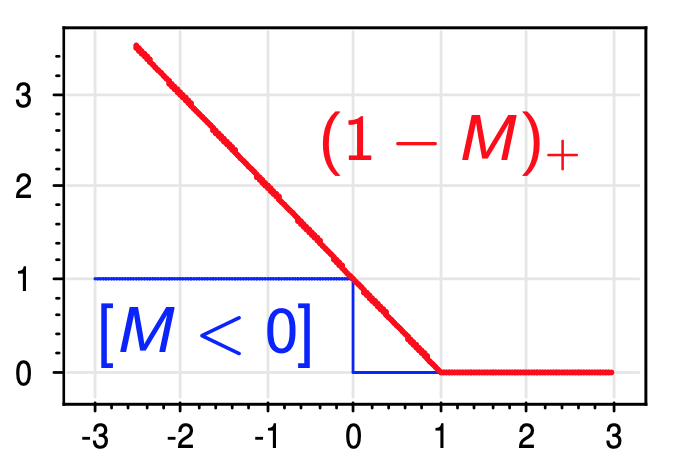

In [1]:
from IPython.display import Image
Image(filename='images/3.1 Метод опорных векторов/image_1.png')

Это одно обоснование вот такой оптимизационной задачи. Есть другое обоснование, которое сейчас приведет ровно к тому же самому функционалу. 

## Оптимальная разделяющая гиперплоскость

Линейный классификатор:

$$a(x, w) = \mathrm{sign}(\left\langle w, x\right\rangle - w_0), w \in \mathbb{R}^n, w_0 \in \mathbb{R}.$$

Пусть выборка $X^l = (x_i, y_i)_{i=1}^{l}$ линейно разделима:

$$\exists w, w_0 : M_i(w, w_0) = y_i(\left\langle w, x_i\right\rangle - w_0) > 0,\ i = 1, \ldots, l.$$

Это означает, что мы точно знаем, что существует такой вектор w и скаляр w0, что все отступы строго положительные. То есть можно так поделить выборку, что ни на одном объекте ошибки не будет.

Заметим, что условие положительности всех отступов определено с точностью до нормировки. Мы можем домножить линейную дискриминантную функцию на любую неотрицательную константу, и система уравнений, которая определяет условие, что все отступы положительные, не изменится. Каждое уравнение в этой системе можно умножить на положительное число. Распорядимся этой свободой выбора нормировочной константы таким образом, чтобы минимальный отступ был равен $1$.

Нормировка: $\min_{i=1,\ldots,l}M_i(w, w_0) = 1.$

И дальше потребуем дополнительного условия оптимальности разделяющей гиперплоскости. Будем строить ее таким образом, чтобы зазор или полоса, разделяющая классы, оказалась максимальной ширины. Как это сделать? Во-первых, очевидно, что мы должны провести разделяющую гиперплоскость ровно посередине такой полосы. Во-вторых, из принципа оптимальности следует, что эта полоса обязана упереться своими краями в объекты обоих классов. 

Вот если мы потребуем максимальности ширины разделяющей полосы, то из этого условия будет следовать существование хотя бы одного объекта класса $−1$, на котором отступ равен $1$ (это значит, дискриминантная функция равна $−1$), и хотя бы одного объекта класса $+1$, на котором дискриминантная функция будет равна $+1$, и соответственно, тоже отступ равен $1$. 

Разделяющая полоса:

$$\{x: -1 \leq \left\langle w, x\right\rangle - w_0 \leq 1\}.$$

Вот из этих условий будет следовать, что ширина полосы может быть вычислена как $2$ поделить на норму вектора $w$ — направляющего вектора разделяющей гиперплоскости. И отсюда следует уже аналитический принцип оптимальности. Если мы хотим, чтобы полоса была максимальной ширины, мы должны минимизировать норму вектора $w$.

Ширина полосы:

$$\frac{\left\langle x_{+} - x_{-}, w\right\rangle}{||w||} = \frac{2}{||w||} \rightarrow \max.$$

## Переход к линейно неразделимой выборке

Постановка задачи в случае линейно разделимой выборки:

$$ \begin{cases}
   \frac{1}{2}||w||^2 \rightarrow \min_{w, w_0};
   \\
   M_i(w, w_0) \geq 1,\  i = 1,\ldots,l.
 \end{cases}$$
 
Мы ослабляем неравенство. Вводим дополнительные неотрицательные переменные $\xi_i$-тое, которые можно рассматривать как штраф за нарушение неравенства.
 
Общий случай - линейно неразделимая выборка:

$$ \begin{cases}
   \frac{1}{2}||w||^2 + C\sum\limits_{i=1}^{l}\xi_i \rightarrow \min_{w, w_0, \xi};
   \\
   M_i(w, w_0) \geq 1 - \xi_i,\  i = 1,\ldots,l;
   \\
   \xi_i \geq 0,\ i = 1,\ldots,l.
 \end{cases}$$
 
Но мы хотели бы, чтобы эти штрафы были бы как можно меньше в сумме. Поэтому мы вводим дополнительное слагаемое сумму штрафов, как добавку к нашему исходному функционалу. И получаем вот такую постановку задачи, которая теперь уже всегда имеет решение. И можно ее решать численными методами.

Исключая $\xi_i$, получаем задачу безусловной минимизации:

$$C\sum\limits_{i=1}^{l}(1 - M_i(w, w_0))_{+} + \frac{1}{2}||w||^2 \rightarrow \min_{w, w_0}.$$

Эта постановка задачи эквивалента той, которую мы изначально вывели из принципов аппроксимации и регуляризации эмпирического риска.

Как эту задачу решать. Задача, которая выписана в виде единого функционала без дополнительных переменных $\xi_i$, она неудобна тем, что функционал в ней не гладкий. Поэтому принято решать задачу, которая представлена в виде квадратичного гладкого функционала с дополнительными переменными $\xi_i$, но зато функционал здесь гладкий, ограничения гладкие, поэтому мы можем воспользоваться стандартным методом решения задач математического программирования, а именно условиями Каруша-Куна-Таккера.

## Условия Каруша-Куна-Таккера

Задача математического программирования:

$$ \begin{cases}
   f(x) \rightarrow \min_{x};
   \\
   g_i(x) \leq 0,\  i = 1,\ldots,m;
   \\
   h_j(x) = 0,\ j = 1,\ldots, k.
 \end{cases}$$
 
Необходимые условия. Если $x$ - точка локального минимума, то существуют множители $\mu_i, i=1,\ldots,m, \lambda_j, j=1,\ldots,k$:

$$\begin{cases}
   \frac{\partial \mathscr{L}}{\partial x} = 0,\ \mathscr{L}(x;\mu, \lambda) = f(x) + \sum\limits_{i=1}^{m}\mu_i g_i(x) + \sum\limits_{j=1}^{k}\lambda_j h_j(x);
   \\
   g_i(x) \leq 0,\  h_j(x) = 0;\ \text{(исходные ограничения)}
   \\
   \mu_i \geq 0; \text{(двойственные ограничения)}
   \\
   \mu_i g_i(x) = 0; \text{(условие дополняющей нажёсткости)}
 \end{cases}$$

## Применение условий ККТ к задаче SVM

Функция Лагранжа:

$$\mathscr{L}(w, w_0, \xi; \lambda, \eta) = \frac{1}{2}||w||^2 - \sum\limits_{i=1}^{l}\lambda_i\Big(M_i(w,w_0) - 1\Big) - \sum\limits_{i=1}^{l}\xi_i(\lambda_i + \eta_i - C),$$

$\lambda_i$ - переменные, двойственные к ограничениям $M_i \geq 1 - \xi_i$;

$\eta_i$ - переменные, двойственные к ограничениям $\xi_i \geq 0$.

Условия ККТ:

$$\begin{cases}
   \frac{\partial \mathscr{L}}{\partial w} = 0,\ \frac{\partial \mathscr{L}}{\partial w_0} = 0,\ \frac{\partial \mathscr{L}}{\partial \xi} = 0;
   \\
   \xi_i \geq 0,\  \lambda_i \geq 0,\ \eta_i \geq 0,\ i = 1,\ldots,l;
   \\
   \lambda_i = 0 \text{ либо } M_i(w, w_0) = 1-\xi_i,\ i = 1,\ldots,l;
   \\
   \eta_i = 0 \text{ либо } \xi_i = 0,\ i = 1,\ldots,l.
 \end{cases}$$

## Двойственная задача

Если все эти условия выписать, то мы приходим к новой системе уравнений, которая называется двойственной задачей. 

$$\begin{cases}
   -\sum\limits_{i=1}^{l}\lambda_i + \frac{1}{2}\sum\limits_{i=1}^{l}\sum\limits_{j=1}^{l}\lambda_i\lambda_jy_iy_j\left\langle x_i, x_j\right\rangle \rightarrow \min_{\lambda};
   \\
   0 \leq \lambda_i \leq C,\ i = 1,\ldots,l;
   \\
   \sum\limits_{i=1}^{l}\lambda_iy_i = 0.
 \end{cases}$$

Это снова задача минимизации, но теперь она содержит только двойственные переменные $\lambda$, на которые есть ограничения неравенств очень простого вида, которые говорят, что все $l$ переменных $\lambda$ должны оказаться в кубе со стороной равной $C$. И осталось еще одно ограничение равенства. 

Это задача квадратичного программирования. Для нее существуют стандартные способы решения, но также разработаны и нестандартные, которые существенно эксплуатируют некоторые специфические особенности именно этой конкретной постановки задачи квадратичного программирования. Мы не будем углубляться в то, как эта задача решается, а заметим, что если у нас есть какой-то способ стандартный решения этой задачи, то он нам даст значение переменных $\lambda$, мы сможем их подставить в выражение для вектора $w$ и для скаляра $w_0$, и тем самым получить готовый алгоритм классификации. 

Решив эту задачу численно относительно $\lambda_i$, получаем линейный классификатор:

$$a(x) = \mathrm{sign}\Big(\sum\limits_{i=1}^{l}\lambda_iy_i\left\langle x_i, x\right\rangle - w_0\Big),$$

где $w_0 = \sum\limits_{i=1}^{l}\lambda_iy_i\left\langle x_i, x_j\right\rangle - y_j$ для такого $j$, что $\lambda_j > 0, M_j=1$.

Если посмотреть на этот алгоритм, то выяснится одна очень важная его особенность. Двойственные переменные $\lambda_i$ для многих объектов будут равны нулю. И если это так случается, то от этого объекта $x_i$-того решение, наш классификатор, зависеть не будет. 

Отсюда __определение__ — объект $x_i$ называется _опорным,_ если соответствующая ему двойственная переменная $\lambda_i$-тое не равна нулю. То есть скалярное произведение этого объекта с классифицируемым объектом входит в выражение для дискриминантной функции. То есть получается, что мы исходно из выборки могли бы выкинуть те объекты, которые не являются опорными, и получился бы ровно такой же классификатор.

## Преимущества и недостатки SVM

__Преимущества__:

- Задача выпуклого квадратичного программирования, имеет единственное решение.

- Выделяется множество опорных объектов.

- Имеются эффективные численные методы для SVM.

- Изящное обобщение на нелинейные классификаторы.

__Недостатки__:

- Опорными объектами могут становиться выбросы.

- Нет отбора признаков в исходном пространстве $X$.

- Приходится подбирать константу $C$.

В чем особенность SVM по сравнению с другими линейными классификаторами?

- Использование кусочно-линейной аппроксимации функции потерь и квадратичного регуляризатора.

# Метод опорных векторов. Обобщение для нелинейного случая

## Двойственная задача

$$\begin{cases}
   -\sum\limits_{i=1}^{l}\lambda_i + \frac{1}{2}\sum\limits_{i=1}^{l}\sum\limits_{j=1}^{l}\lambda_i\lambda_jy_iy_j\left\langle x_i, x_j\right\rangle \rightarrow \min_{\lambda};
   \\
   0 \leq \lambda_i \leq C,\ i = 1,\ldots,l;
   \\
   \sum\limits_{i=1}^{l}\lambda_iy_i = 0.
 \end{cases}$$

Решив эту задачу численно относительно $\lambda_i$, получаем линейный классификатор:

$$a(x) = \mathrm{sign}\Big(\sum\limits_{i=1}^{l}\lambda_iy_i\left\langle x_i, x\right\rangle - w_0\Big),$$

где $w_0 = \sum\limits_{i=1}^{l}\lambda_iy_i\left\langle x_i, x_j\right\rangle - y_j$ для такого $j$, что $\lambda_j > 0, M_j=1$.

__Определение__ — объект $x_i$ называется _опорным,_ если соответствующая ему двойственная переменная $\lambda_i$-тое не равна нулю.

Заметим, что как сама постановка задачи, так и получаемое решение алгоритма классификации зависит не от самих признаковых описаний объектов как векторов в $\mathbb{R}^n$, а только от их попарных скалярных произведений. И это даёт интересную возможность: взять и заменить скалярное произведение некоторой функции $K$ от пары объектов. 

Эту функцию можно взять нелинейной, и, вообще говоря, возникает вопрос: а есть ли какие-то ограничения на такие функции? Любую ли функцию $K$ мы можем сюда подставить и рассчитывать на то, что задача по-прежнему будет решаться теми же самыми методами? Ну, очевидно, что функция $K$ всё же должна быть скалярным произведением, но она может быть скалярным произведением в каком-то другом пространстве, необязательно в пространстве исходных описаний объектов.

## Ядра для нелинейного обощения SVM

__Определение__

Функция от пары объектов $K(x, x')$ называется ядром, если она допускает представление в виде скалярного произведения

$$K(x, x') = \left\langle \phi(x), \phi(x')\right\rangle$$

при некотором преобразовании $\phi : X \rightarrow H$ из пространства признаков $X$ в новое спрямляющее пространство $H$.

__Возможная интерпретация__:

признак $f_i(x) = K(x_i, x)$ - это оценка близости объекта $x$ к опорному объекту $x_i$. Выбирая опорные объекты, SVM осуществляет отбор признаков в линейном классификаторе

$$a(x) = \mathrm{sign}\Big(\sum\limits_{i=1}^{l}\lambda_i y_i K(x_i, x) - w_0\Big).$$

## Примеры ядер

Любая ли функция может быть ядром? На самом деле, не любая, а только та, которая представима в виде скалярного произведения в каком-то пространстве. Это приводит к довольно сложно проверяемым условиям неотрицательной определённости функции $K$. Но на практике, как правило, используют просто стандартный набор ядер. Обычно их некоторое количество реализовано в том пакете, где реализован тот или иной алгоритм оптимизации SVM, и, подбирая один из библиотечных вариантов этих ядер, мы, как правило, строим более-менее неплохой алгоритм. 

Интересно, что выбором ядра можно перейти в такое спрямляющее пространство, что, строя в нём линейный классификатор, в исходном пространстве мы будем строить какую-то известную модель классификации, например, один из классических вариантов, — это полиномиальная разделяющая поверхность заданной степени. Степень $d$ является параметром ядра и может задаваться.

Ядра в SVM расширяют линейную модель классификации:

- $K(x, x') = \Big(\left\langle x, x'\right\rangle + 1\Big)^d$ - полиномиальная разделяющая поверхность степени $\leq d$.

Либо мы можем взять некоторую функцию $\sigma$ от скалярного произведения векторов $(x, x')$ и получить ядро, которое формально нам даст классификатор, являющийся двухслойной нейронной сетью с функцией активации $\sigma$. То есть ядро — это как бы первый слой этой нейронной сети, а второй слой — это, собственно, линейный классификатор. 

- $K(x, x') = \sigma\Big(\left\langle x, x'\right\rangle\Big)$ - нейронная сеть с заданной функцией активации $\sigma(z)$ ($K$ не при всех $\sigma$ является ядром).

- $K(x, x') = \mathrm{th}\Big(k_1\left\langle x, x'\right\rangle - k_0\Big),\ k_0,k_1 \geq 0$ - нейросеть с сигмоидными функциями активации.

Ещё популярные ядра — это экспоненциальные или гауссовские, которые приводят к сети радиальных базисных функций RBF. 

- $K(x, x') = \mathrm{exp}\Big(-\gamma ||x - x'||^2\Big)$ - сеть радиальных базисных функций (RBF ядро).

Зачем в SVM вводятся ядра?

- Чтобы лучше описывать более сложные закономерности в данных. Действительно, введение ядер ("kernel trick") позволяет строить более сложные разделяющие поверхности.

- Без ядер нельзя построить нелинейную разделяющую поверхность. Это верно. В классической постановке SVM является линейным алгоритмом и умеет строить только линейные разделяющие поверхности.

## Классификация с различными ядрами

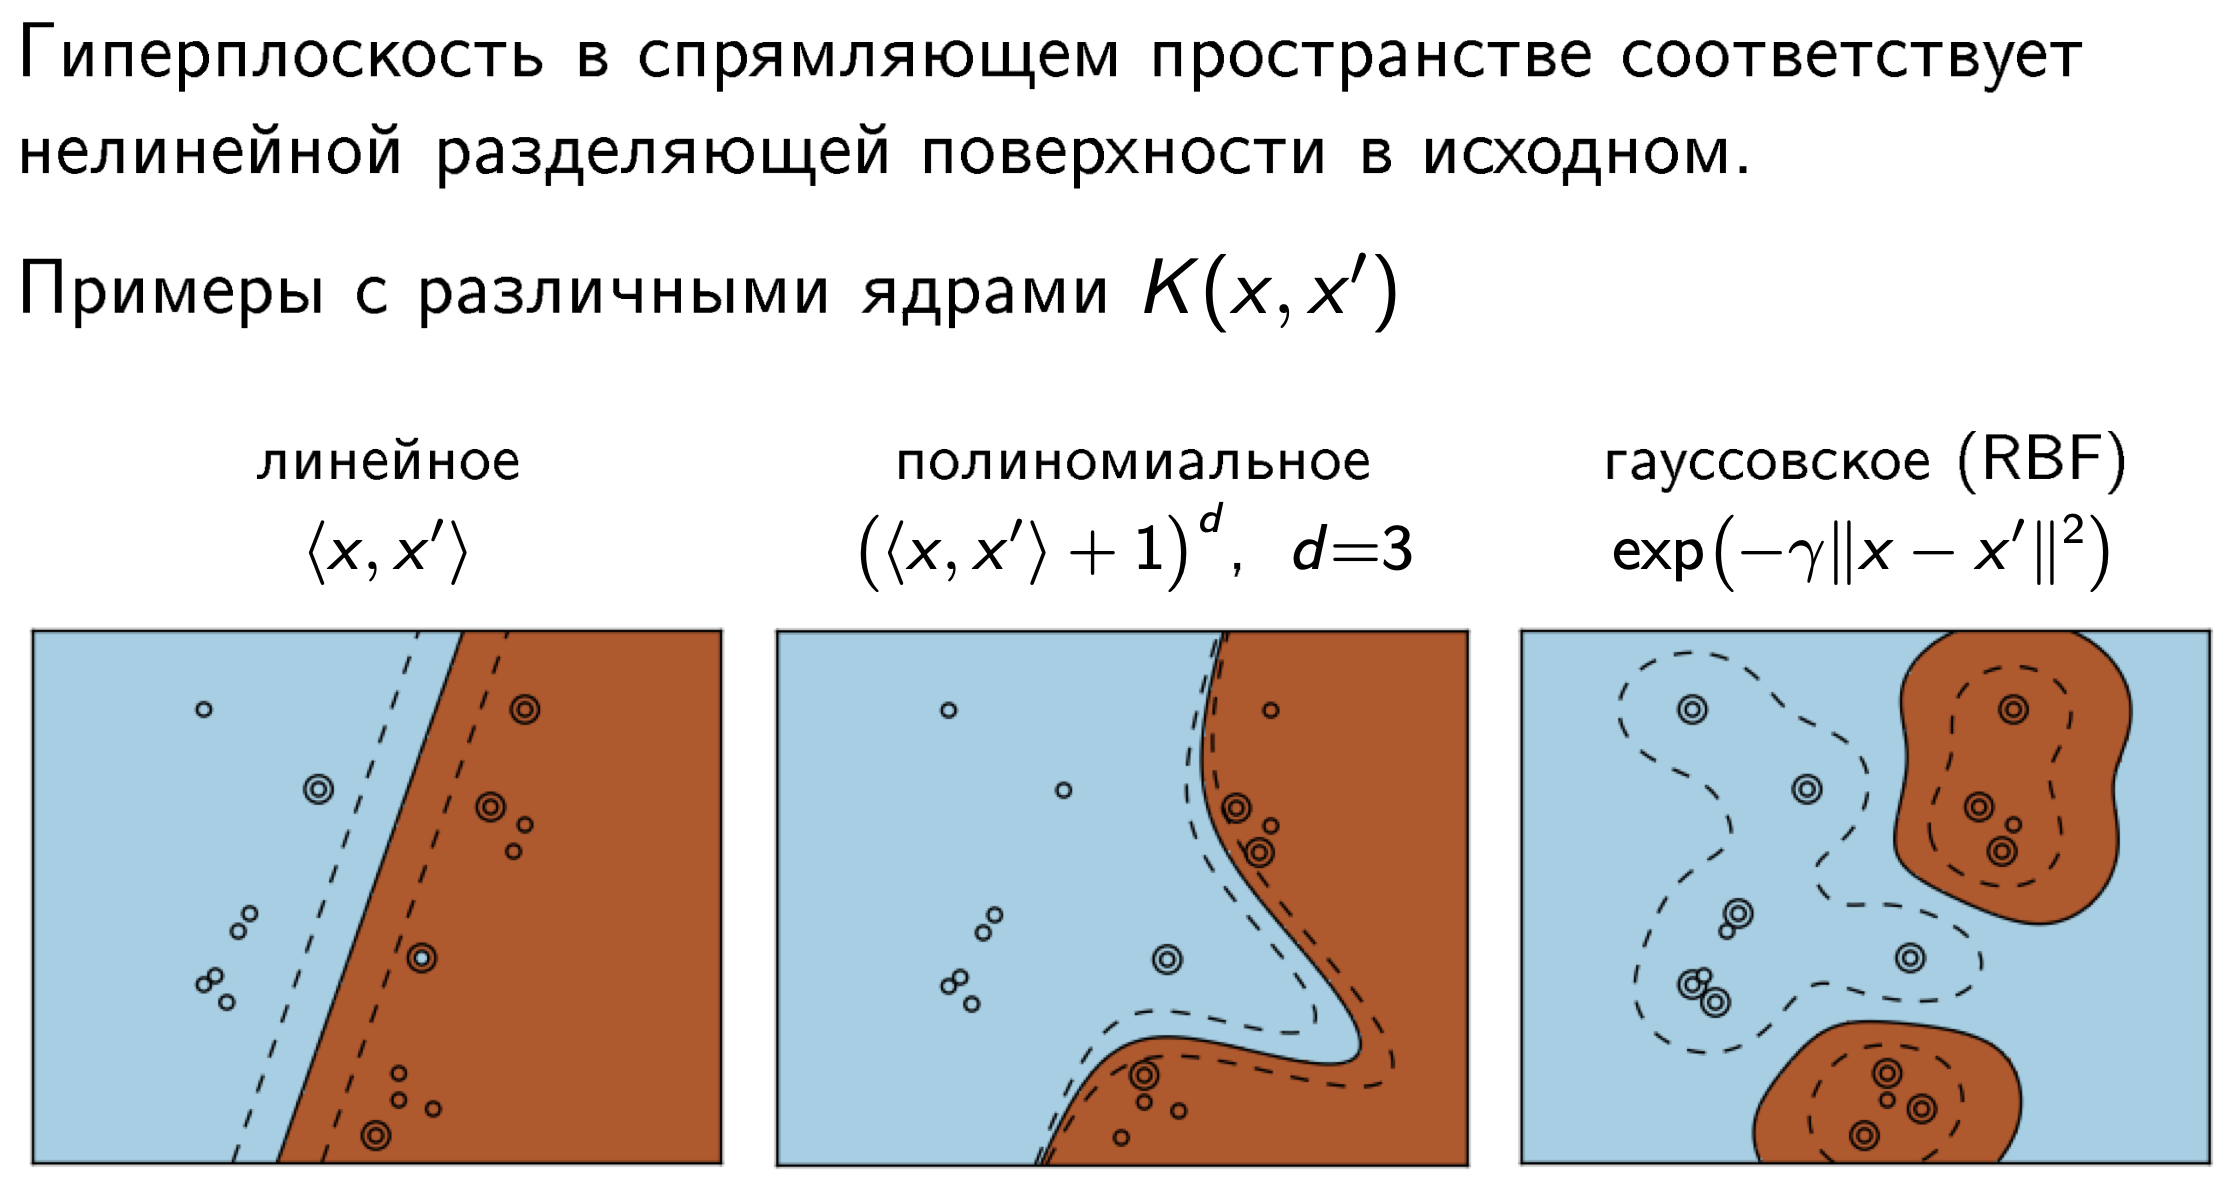

In [2]:
Image(filename='images/3.1 Метод опорных векторов/example_1.png')

## Влияние константы C на решение SVM

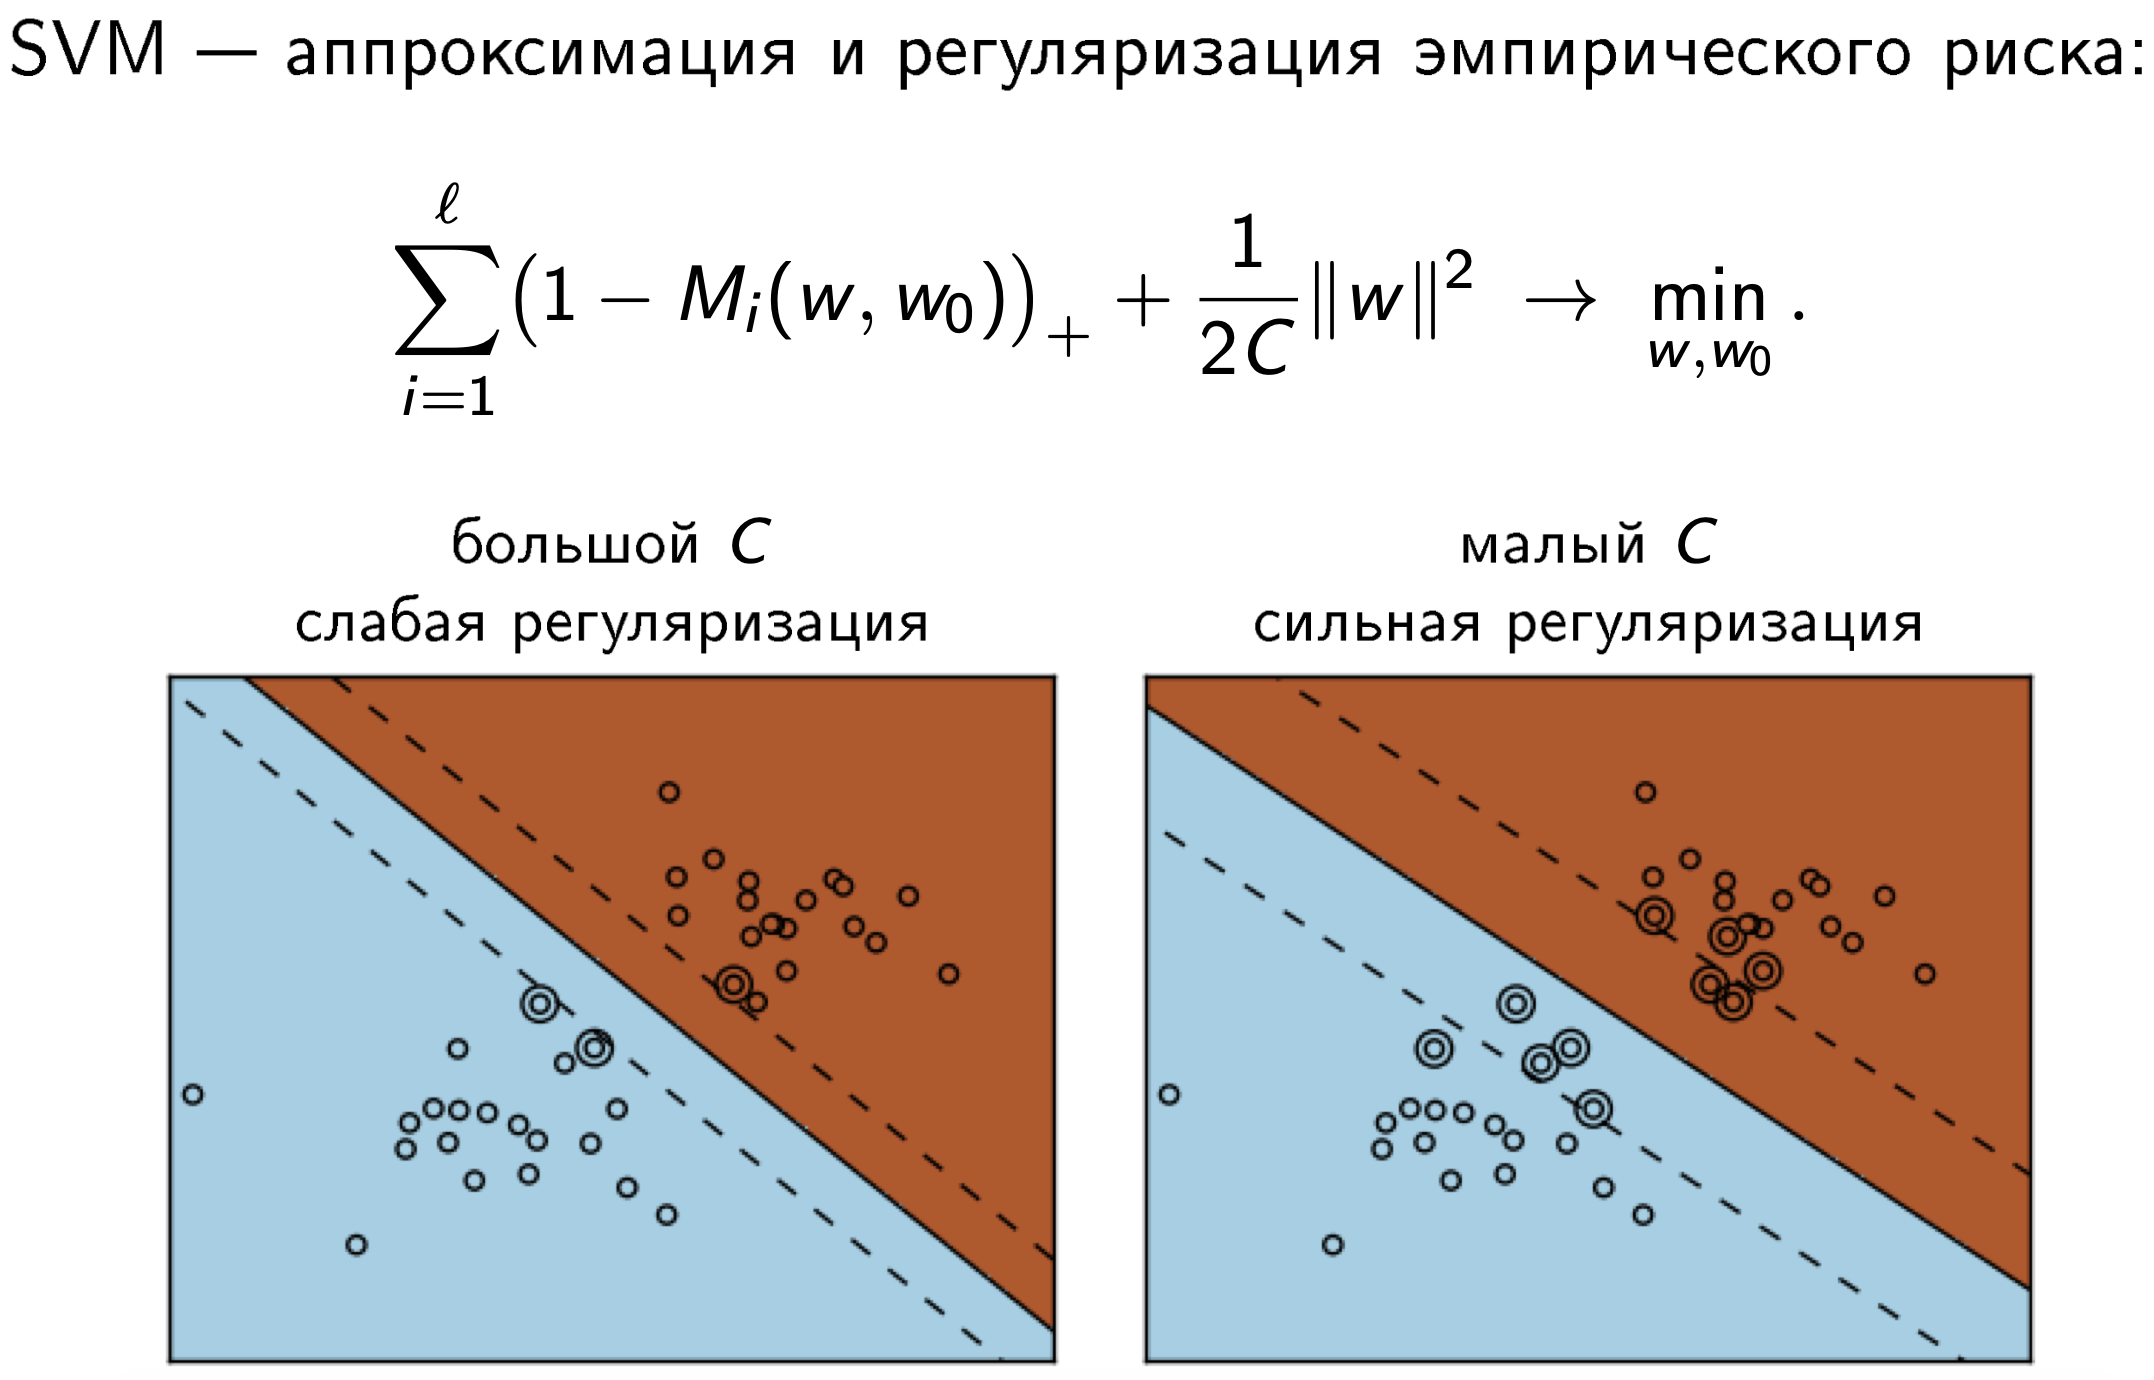

In [3]:
Image(filename='images/3.1 Метод опорных векторов/example_2.png')

Действительно, константа $C$ — это баланс между двумя требованиями: с одной стороны минимизация нормы вектора $w$ — это максимизация ширины зазора между классами, и, если мы увеличиваем константу $C$, мы тем самым ослабляем эту регуляризацию, и зазор может стать уже, но при этом у нас уменьшаются штрафы за то, что объекты выходят за пределы разделяющей полосы. То есть при малой константе $C$ мы получаем сильную регуляризацию, полоса расширяется, но зато она может захватить чуть больше объектов.

Какое из этих утверждений относится к методу опорных векторов?

- Его предсказание зависит лишь от части объектов. Метод опорных векторов строит классификатор, ответ которого зависит лишь от части объектов обучающей выборки, называемых "опорными".

Почему для метода опорных векторов возможно нелинейное обобщение?

- Задачу метода опорных векторов можно переписать так, что она будет зависеть только от скалярных произведений объектов. Эти скалярные произведения можно заменить на функцию, вычисляющую скалярное произведение в пространстве более высокой размерности.

# Опорные объекты

Метод опорных векторов (Support Vector Machine, SVM) — один из видов линейных классификаторов. Функционал, который он оптимизирует, направлен на максимизацию ширины разделяющей полосы между классами. Из теории статистического обучения известно, что эта ширина тесно связана с обобщающей способностью алгоритма, а ее максимизация позволяет бороться с переобучением.

Метод опорных векторов имеет еще одну особенность. Если преобразовать его оптимизационную задачу, то окажется, что итоговый классификатор можно представить как взвешенную сумму скалярных произведений данного объекта на объекты обучающей выборки:

$$a(x) = \mathrm{sign}\Big(\sum\limits_{i=1}^{l}\lambda_iy_i\left\langle x_i, x\right\rangle - w_0\Big).$$

По сути, алгоритм делает предсказания на основе сходства нового объекта с объектами обучающей выборки. При этом, как правило, далеко не все коэффициенты оказываются ненулевыми. Это означает, что классификация делается на основе сходства лишь с частью обучающих объектов. Такие объекты называются _опорными_.

## Реализация в Scikit-Learn

Метод опорных векторов реализован в классе sklearn.svm.SVC.

- Основными параметрами этого класса являются коэффициент С и тип ядра kernel. В данной задаче мы будем использовать линейное ядро — для этого нужно задать значение параметра kernel='linear'

- Индексы опорных объектов обученного классификатора хранятся в поле support_

In [11]:
import pandas as pd


data = pd.read_csv('data/svm-data.csv', header=None, names=['y', 'x1', 'x2'])
X, y = data.iloc[:, [1,2]], data.iloc[:, 0]

In [12]:
X.head()

,x1,x2
0,0.70,0.29
1,0.23,0.55
2,0.72,0.42
3,0.98,0.68
4,0.48,0.39


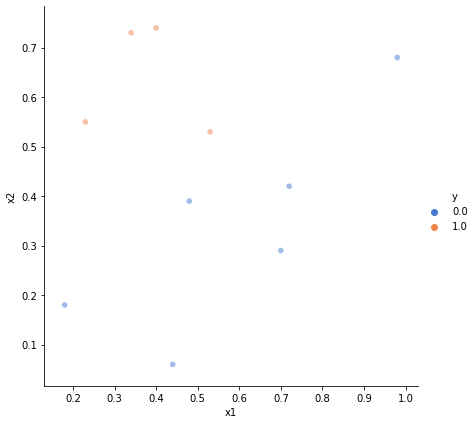

In [23]:
import seaborn as sns


sns.relplot(x='x1', y='x2', hue='y', 
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

Обучите классификатор с линейным ядром, параметром C = 100000 и random_state=241. Такое значение параметра нужно использовать, чтобы убедиться, что SVM работает с выборкой как с линейно разделимой. При более низких значениях параметра алгоритм будет настраиваться с учетом слагаемого в функционале, штрафующего за маленькие отступы, из-за чего результат может не совпасть с решением классической задачи SVM для линейно разделимой выборки.

In [13]:
from sklearn.svm import SVC


clf = SVC(kernel='linear', C = 100000, random_state=241)
clf.fit(X, y)

SVC(C=100000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=241, shrinking=True, tol=0.001,
    verbose=False)

Найдите номера объектов, которые являются опорными (нумерация с единицы). Они будут являться ответом на задание. Обратите внимание, что в качестве ответа нужно привести номера объектов в возрастающем порядке через запятую или пробел. Нумерация начинается с 1.

In [14]:
clf.support_

array([3, 4, 9], dtype=int32)

In [21]:
ans = ''
for el in clf.support_:
    ans += str(el + 1) + ' '

with open('answers/ans_svm_1.txt', 'w') as f:
    f.write(ans[:-1])

# Анализ текстов

Метод опорных векторов (Support Vector Machine, SVM) — один из видов линейных классификаторов. Функционал, который он оптимизирует, направлен на максимизацию ширины разделяющей полосы между классами. Из теории статистического обучения известно, что эта ширина тесно связана с обобщающей способностью алгоритма, а ее максимизация позволяет бороться с переобучением.

Одна из причин популярности линейных методов заключается в том, что они хорошо работают на разреженных данных. Так называются выборки с большим количеством признаков, где на каждом объекте большинство признаков равны нулю. Разреженные данные возникают, например, при работе с текстами. Дело в том, что текст удобно кодировать с помощью "мешка слов" — формируется столько признаков, сколько всего уникальных слов встречается в текстах, и значение каждого признака равно числу вхождений в документ соответствующего слова. Ясно, что общее число различных слов в наборе текстов может достигать десятков тысяч, и при этом лишь небольшая их часть будет встречаться в одном конкретном тексте.

Можно кодировать тексты хитрее, и записывать не количество вхождений слова в текст, а TF-IDF. Это показатель, который равен произведению двух чисел: TF (term frequency) и IDF (inverse document frequency). Первая равна отношению числа вхождений слова в документ к общей длине документа. Вторая величина зависит от того, в скольки документах выборки встречается это слово. Чем больше таких документов, тем меньше IDF. Таким образом, TF-IDF будет иметь высокое значение для тех слов, которые много раз встречаются в данном документе, и редко встречаются в остальных.

Как мы уже говорили выше, линейные методы часто применяются для решения различных задач анализа текстов. В этом задании мы применим метод опорных векторов для определения того, к какой из тематик относится новость: атеизм или космос.

## Реализация в Scikit-Learn

In [34]:
import pandas
import numpy as np
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold

In [35]:
newsgroups = datasets.fetch_20newsgroups(
                    subset='all', 
                    categories=['alt.atheism', 'sci.space']
             )

X = newsgroups.data
y = newsgroups.target

После выполнения этого кода массив с текстами будет находиться в поле newsgroups.data, номер класса — в поле newsgroups.target.

Одна из сложностей работы с текстовыми данными состоит в том, что для них нужно построить числовое представление. Одним из способов нахождения такого представления является вычисление TF-IDF. В Scikit-Learn это реализовано в классе sklearn.feature_extraction.text.TfidfVectorizer. Преобразование обучающей выборки нужно делать с помощью функции fit_transform, тестовой — с помощью transform.

Реализация SVM-классификатора находится в классе sklearn.svm.SVC. Веса каждого признака у обученного классификатора хранятся в поле coef_. Чтобы понять, какому слову соответствует i-й признак, можно воспользоваться методом get_feature_names() у TfidfVectorizer.

Вычислите TF-IDF-признаки для всех текстов. Обратите внимание, что в этом задании мы предлагаем вам
вычислить TF-IDF по всем данным. При таком подходе получается, что признаки на обучающем множестве используют информацию из тестовой выборки — но такая ситуация вполне законна, поскольку мы не используем значения целевой
переменной из теста. На практике нередко встречаются ситуации, когда признаки объектов тестовой выборки известны на
момент обучения, и поэтому можно ими пользоваться при обучении алгоритма.

In [36]:
vectorizer = TfidfVectorizer()
vectorizer.fit_transform(X)

<1786x28382 sparse matrix of type '<class 'numpy.float64'>'
	with 303138 stored elements in Compressed Sparse Row format>

Подберите минимальный лучший параметр C из множества [10^-5, 10^-4, ... 10^4, 10^5] для SVM с линейным ядром (kernel='linear') при помощи кросс-валидации по 5 блокам. Укажите параметр random_state=241 и для SVM, и для KFold. В качестве меры качества используйте долю верных ответов (accuracy).

In [41]:
grid = {'C': np.power(10.0, np.arange(-5, 6))}
cv = KFold(n_splits=5, shuffle=True, random_state=241)
model = SVC(kernel='linear', random_state=241)
gs = GridSearchCV(model, grid, scoring='accuracy', cv=cv)
gs.fit(vectorizer.transform(X), y)

GridSearchCV(cv=KFold(n_splits=5, random_state=241, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=241, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [47]:
C = gs.best_params_.get('C')
C

1.0

Обучите SVM по всей выборке с оптимальным параметром C, найденным на предыдущем шаге.

In [48]:
model = SVC(kernel='linear', random_state=241, C=C)
model.fit(vectorizer.transform(X), y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=241, shrinking=True, tol=0.001,
    verbose=False)

Найдите 10 слов с наибольшим по модулю весом. Они являются ответом на это задание. Укажите их через запятую или пробел, в нижнем регистре, в лексикографическом порядке.

In [50]:
words = np.array(vectorizer.get_feature_names())
word_weights = pd.Series(model.coef_.data, index=words[model.coef_.indices], name="weight")
word_weights.index.name = "word"

top_words = word_weights.abs().sort_values(ascending=False).head(10)
top_words

word
space       2.663165
god         1.920379
atheism     1.254690
atheists    1.249180
moon        1.201611
sky         1.180132
religion    1.139081
bible       1.130612
keith       1.097094
sci         1.029307
Name: weight, dtype: float64

In [53]:
with open('answers/ans_svm_text_1.txt', 'w') as f:
    f.write(" ".join(top_words.index.sort_values(ascending=True)))